In [1]:
%config InlineBackend.figure_format='png'
%matplotlib inline

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import cartopy.crs as crs

# import glob

from netCDF4 import Dataset as ds
import xarray as xr
import cftime
from datetime import datetime
# from netCDF4 import MFDataset as mfds

## Check what's in wrfinput_d0*

In [3]:
wrfinput = ds('/ccs/home/h1x/scratchp/wrfhydro_cacti/wrfhydro2wrfinput/original/20190125/era5eda_en01/run20190125_thom_k150ptop11_dzbot25_dzsts1.05_dzstu1.05/wrfinput_d01')

In [11]:
print(list(wrfinput.variables))

['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'EROD', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'T_INIT', 'MU', 'MUB', 'P', 'AL', 'ALB', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'T_BASE', 'CFN', 'CFN1', 'STEP_NUMBER', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'DTS', 'DTSEPS', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'QNICE', 'QNRAIN', 'FCX', 'GCX', 'TOPOSLPX', 'TOPOSLPY', 'SHDMAX', 'SHDMIN', 'SNOALB', 'LANDUSEF', 'SOILCTOP', 'SOILCBOT', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'SNOW', 'SNOWH', 'CANWAT', 'FNDSNOWH', 'FNDSOILW', 'FNDALBSI', 'FNDSNOWSI', 'FNDICEDEPTH', 'LAKE_DEPTH', 'UOCE', 'VOCE', 'FRC_URB2D', 'LAI', 'VAR', 'CON', 'OA1', 'OA2', 'OA3', 'OA4', 'OL1', 'OL2', 'OL3', 'OL4', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E',

In [4]:
wrfhydro = ds('/ccs/home/h1x/scratchp/wrfhydro_cacti/wrfhydro_run/run01_d01/out/201901250000.LDASOUT_DOMAIN1')

In [33]:
soil_t = wrfhydro['SOIL_T']
soil_m = wrfhydro['SOIL_M']
tg = wrfhydro['TG']
print(np.ma.count_masked(soil_t[:]))
print(np.ma.count_masked(soil_m[:]))
print(np.ma.count_masked(tg[:]))

708
0
177


In [38]:
tsk = wrfinput['TSK']
tslb = wrfinput['TSLB']
print(tslb)
print(np.ma.count_masked(tsk[:]))
lakemask = wrfinput['LAKEMASK']
print(lakemask[:].sum())
print(np.ma.count_masked(lakemask[:]))

<class 'netCDF4._netCDF4.Variable'>
float32 TSLB(Time, soil_layers_stag, south_north, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: SOIL TEMPERATURE
    units: K
    stagger: Z
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (1, 4, 136, 130)
filling on, default _FillValue of 9.969209968386869e+36 used
0
177.0
0


In [17]:
print(list(wrfhydro.variables))

['time', 'reference_time', 'x', 'y', 'crs', 'IVGTYP', 'ISLTYP', 'FVEG', 'LAI', 'SAI', 'SWFORC', 'COSZ', 'LWFORC', 'RAINRATE', 'EMISS', 'FSA', 'FIRA', 'GRDFLX', 'HFX', 'LH', 'ECAN', 'EDIR', 'ALBEDO', 'ETRAN', 'UGDRNOFF', 'SFCRNOFF', 'CANLIQ', 'CANICE', 'ZWT', 'WA', 'WT', 'ACCPRCP', 'ACCECAN', 'ACCEDIR', 'ACCETRAN', 'SAV', 'TR', 'EVC', 'IRC', 'SHC', 'IRG', 'SHG', 'EVG', 'GHV', 'SAG', 'IRB', 'SHB', 'EVB', 'GHB', 'TRAD', 'TG', 'TV', 'TAH', 'TGV', 'TGB', 'T2MV', 'T2MB', 'Q2MV', 'Q2MB', 'EAH', 'FWET', 'ZSNSO_SN', 'SNICE', 'SNLIQ', 'SOIL_T', 'SOIL_W', 'SNOW_T', 'SOIL_M', 'SNOWH', 'SNEQV', 'QSNOW', 'ISNOW', 'FSNO', 'ACSNOW', 'ACSNOM', 'CM', 'CH', 'CHV', 'CHB', 'CHLEAF', 'CHUC', 'CHV2', 'CHB2', 'LFMASS', 'RTMASS', 'STMASS', 'WOOD', 'STBLCP', 'FASTCP', 'NEE', 'GPP', 'NPP', 'PSN', 'APAR', 'ACCET', 'CANWAT', 'SOILICE', 'SOILSAT_TOP', 'SOILSAT', 'SNOWT_AVG', 'ALBSND', 'ALBSNI']


In [13]:
t = "201901250000"
era5_dir = "/ccs/home/h1x/scratchp/wrfhydro_cacti/era5-land/regridded/d01"
swvl1_era = ds("{:s}/swvl1_{:s}.nc".format(era5_dir, t))['swvl1'][:]
# swvl2_era = ds("{:s}/swvl2_{:s}.nc".format(era5_dir, t))['swvl2'][:]
# swvl3_era = ds("{:s}/swvl3_{:s}.nc".format(era5_dir, t))['swvl3'][:]
# swvl4_era = ds("{:s}/swvl4_{:s}.nc".format(era5_dir, t))['swvl4'][:]
stl1_era = ds("{:s}/stl1_{:s}.nc".format(era5_dir, t))['stl1'][:]
# stl2_era = ds("{:s}/stl2_{:s}.nc".format(era5_dir, t))['stl2'][:]
# stl3_era = ds("{:s}/stl3_{:s}.nc".format(era5_dir, t))['stl3'][:]
# stl4_era = ds("{:s}/stl4_{:s}.nc".format(era5_dir, t))['stl4'][:]

In [5]:
wrf_lats = wrfinput['XLAT'][0,:,:]
wrf_lons = wrfinput['XLONG'][0,:,:]

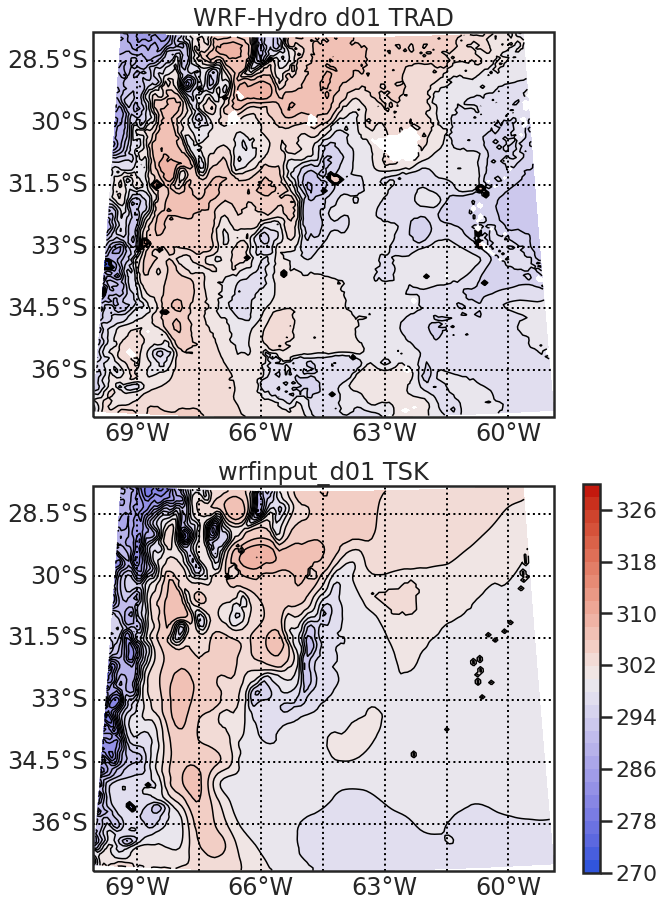

In [22]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
levs = np.arange(270., 330.1, 2.)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrfinput['TSK'][0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  wrfinput['TSK'][0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('wrfinput_d01 TSK')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, wrfhydro['TRAD'][0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, wrfhydro['TRAD'][0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'WRF-Hydro d01 TRAD')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

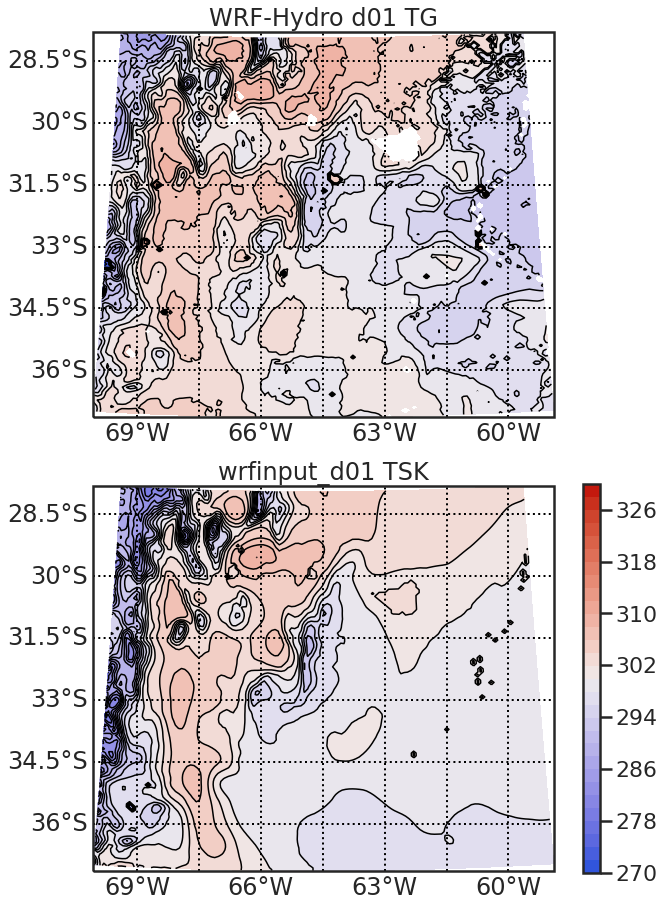

In [21]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
levs = np.arange(270., 330.1, 2.)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrfinput['TSK'][0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  wrfinput['TSK'][0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('wrfinput_d01 TSK')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, wrfhydro['TG'][0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, wrfhydro['TG'][0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'WRF-Hydro d01 TG')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

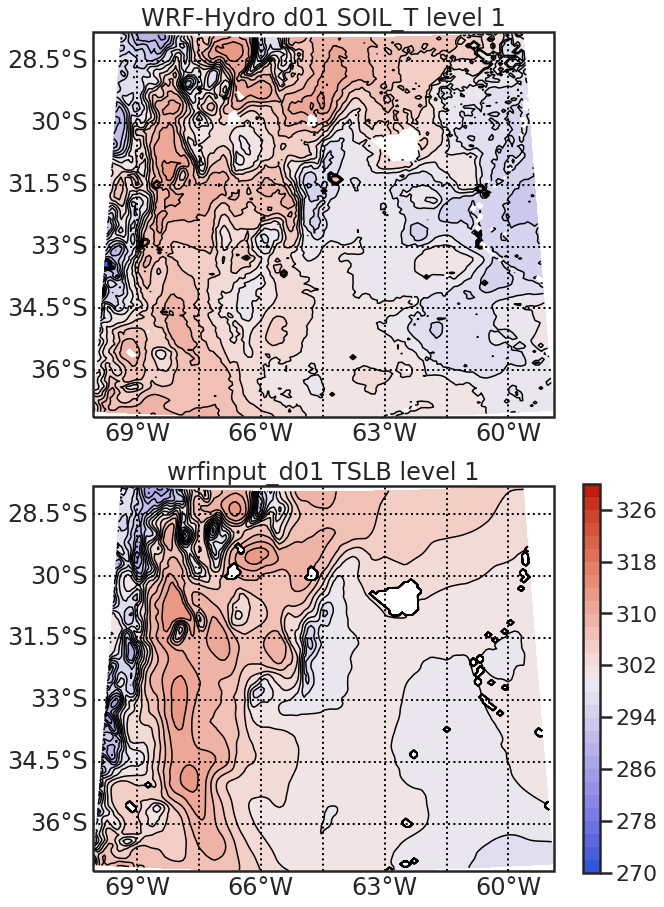

In [38]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
levs = np.arange(270., 330.1, 2.)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrfinput['TSLB'][0,0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  wrfinput['TSLB'][0,0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('wrfinput_d01 TSLB level 1')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, wrfhydro['SOIL_T'][0,:,0,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, wrfhydro['SOIL_T'][0,:,0, :],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'WRF-Hydro d01 SOIL_T level 1')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

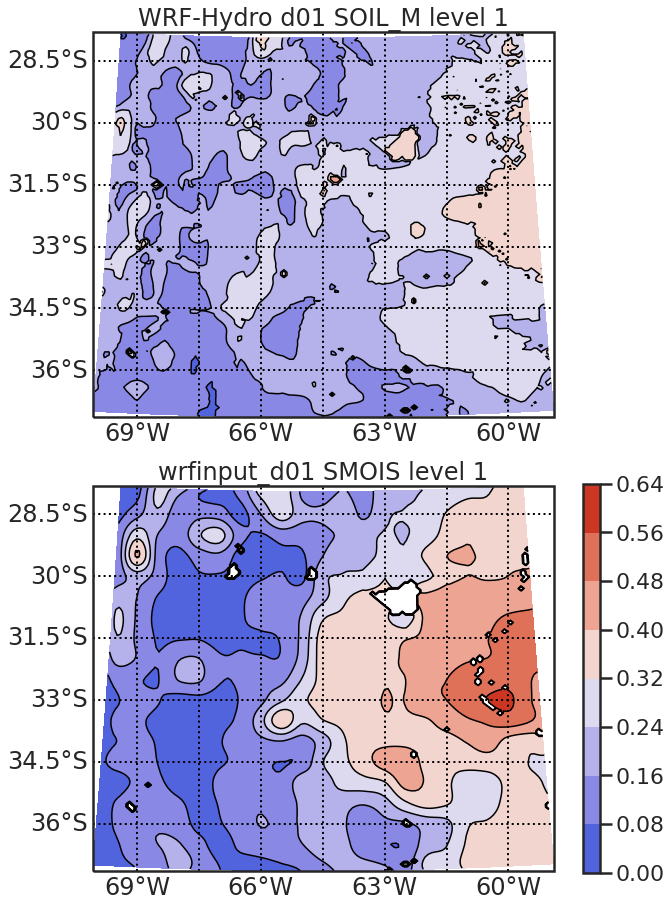

In [23]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
levs = np.arange(0., 0.65, 0.08)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrfinput['SMOIS'][0,0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  wrfinput['SMOIS'][0,0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('wrfinput_d01 SMOIS level 1')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, wrfhydro['SOIL_M'][0,:,0,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, wrfhydro['SOIL_M'][0,:,0, :],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'WRF-Hydro d01 SOIL_M level 1')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

/ccs/home/h1x/.conda/envs/wrf-python/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1548: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


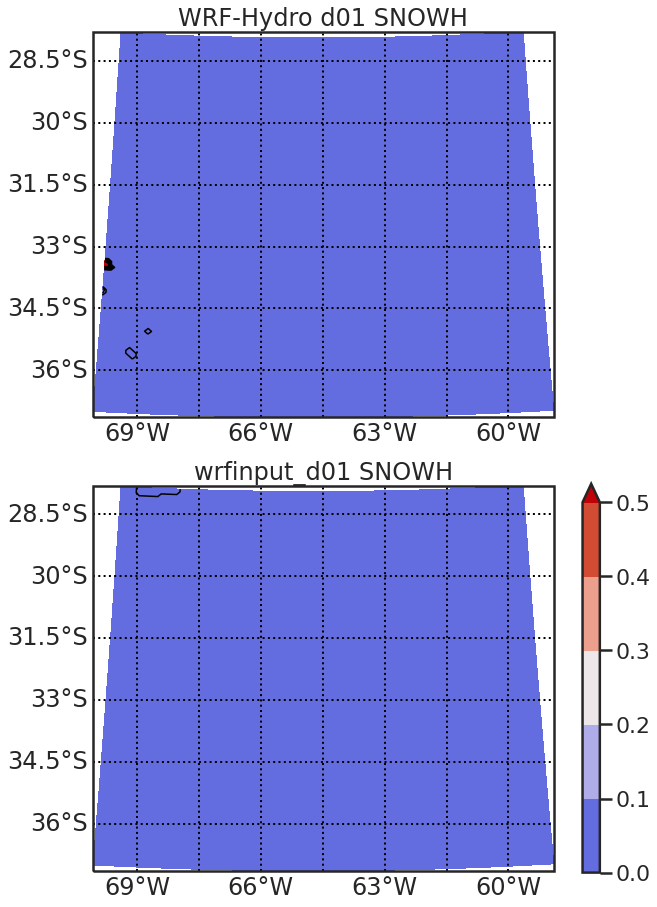

In [42]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
levs = np.arange(0., 0.51, 0.1)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrfinput['SNOWH'][0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  wrfinput['SNOWH'][0,:,:],
            levels=levs,
            extend='max',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('wrfinput_d01 SNOWH')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, wrfhydro['SNOWH'][0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax2.contourf(wrf_lons, wrf_lats, wrfhydro['SNOWH'][0,:,:],
            levels=levs,
            extend='max',
            cmap=cc.cm.coolwarm)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'WRF-Hydro d01 SNOWH')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

/ccs/home/h1x/.conda/envs/wrf-python/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1548: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


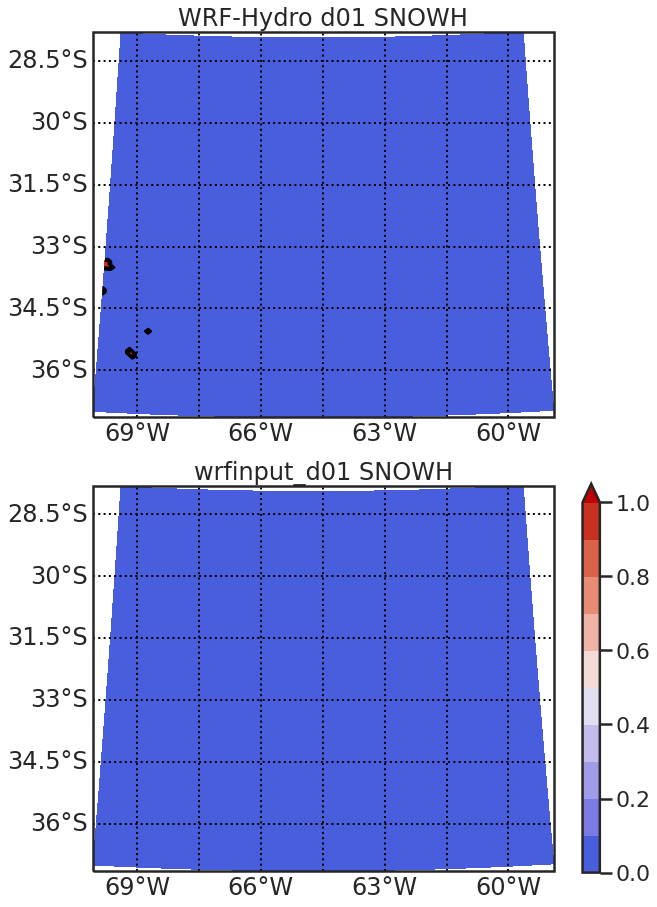

In [47]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
levs = np.arange(0., 1.01, 0.1)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrfinput['SNOWC'][0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats,  wrfinput['SNOWC'][0,:,:],
            levels=levs,
            extend='max',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('wrfinput_d01 SNOWC')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, wrfhydro['FSNO'][0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax2.contourf(wrf_lons, wrf_lats, wrfhydro['FSNO'][0,:,:],
            levels=levs,
            extend='max',
            cmap=cc.cm.coolwarm)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('WRF-Hydro d01 FSNO')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

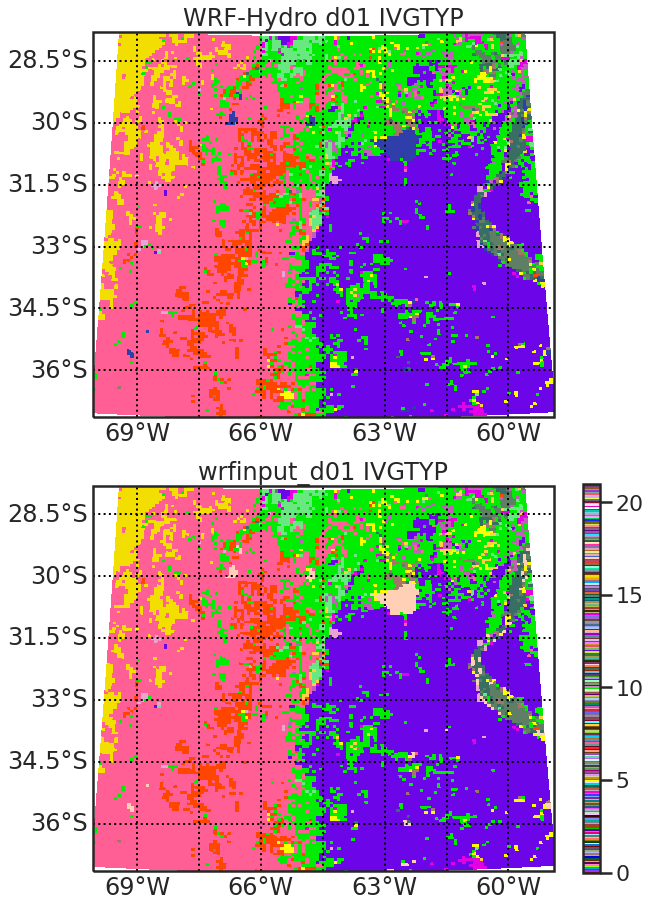

In [16]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
# levs = np.arange(0., 1.01, 0.1)
# levs = None
levs = np.arange(-0.5, 21.6, 1)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
# ax1.contour(wrf_lons, wrf_lats, wrfinput['IVGTYP'][0,:,:],
#             levels=levs,
#             linewidths = 1.5,
#             colors="black")
ct = ax1.pcolormesh(wrf_lons, wrf_lats,  wrfinput['IVGTYP'][0,:,:],
            # levels=levs,
            # extend='neither',
            shading='nearest',
            vmin=0,
            vmax=21,
            cmap=cc.cm.glasbey)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('wrfinput_d01 IVGTYP')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
# ax2.contour(wrf_lons, wrf_lats, wrfhydro['IVGTYP'][0,:,:],
#             levels=levs,
#             linewidths = 1.5,
#             colors="black")
ct = ax2.pcolormesh(wrf_lons, wrf_lats, wrfhydro['IVGTYP'][0,:,:],
            # levels=levs,
            # extend='neither',
            vmin=0,
            vmax=21,
            shading="nearest",
            cmap=cc.cm.glasbey)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('WRF-Hydro d01 IVGTYP')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

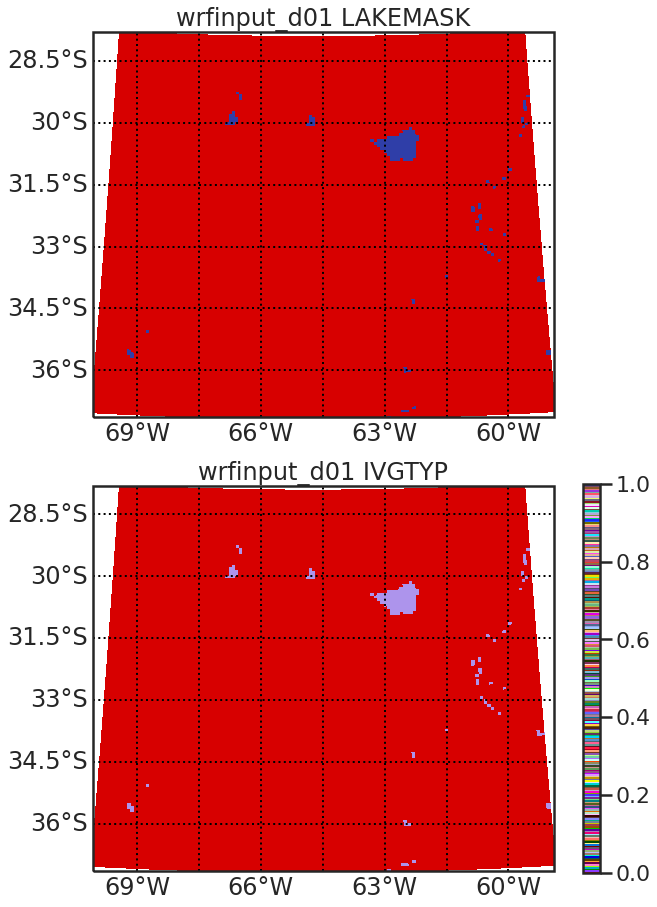

In [20]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
# levs = np.arange(0., 1.01, 0.1)
# levs = None
levs = np.arange(-0.5, 21.6, 1)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
# ax1.contour(wrf_lons, wrf_lats, wrfinput['IVGTYP'][0,:,:],
#             levels=levs,
#             linewidths = 1.5,
#             colors="black")
ct = ax1.pcolormesh(wrf_lons, wrf_lats,  wrfinput['IVGTYP'][0,:,:],
            # levels=levs,
            # extend='neither',
            shading='nearest',
            vmin=16.5,
            vmax=17.5,
            cmap=cc.cm.glasbey)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('wrfinput_d01 IVGTYP')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
# ax2.contour(wrf_lons, wrf_lats, wrfhydro['IVGTYP'][0,:,:],
#             levels=levs,
#             linewidths = 1.5,
#             colors="black")
ct = ax2.pcolormesh(wrf_lons, wrf_lats, wrfinput['LAKEMASK'][0,:,:],
            # levels=levs,
            # extend='neither',
            # vmin=17,
            # vmax=17,
            shading="nearest",
            cmap=cc.cm.glasbey)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('wrfinput_d01 LAKEMASK')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()